# Assignment 1 - INF367

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import numpy as np
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector, Operator


### 1.1 Playing with Quantum Circuits

|ψ⟩= 1√2 (|RRLL⟩−|LLRR⟩)

In [3]:
qc = QuantumCircuit(4)

#qc.h(3)
#qc.h(3)

qc.h(3)

#qc.u(np.pi, np.pi/2, np.pi/2,3)
statevector = Statevector(qc)
display(statevector.draw('latex'))
display(qc.draw(reverse_bits=True))
x = Operator(qc).to_matrix()
x /= 1/4
display(array_to_latex(x))


<IPython.core.display.Latex object>

┌───┐
q_3: ┤ H ├
     └───┘
q_2: ─────
          
q_1: ─────
          
q_0: ─────

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(4)
qc.h(3)
qc.h(2)
qc.h(1)
qc.cx(2,3)
statevector = Statevector(qc)
display(statevector.draw('latex'))
display(qc.draw(reverse_bits=True))
#x = Operator(qc).to_matrix()
#display(array_to_latex(x))


<IPython.core.display.Latex object>

┌───┐┌───┐
q_3: ┤ H ├┤ X ├
     ├───┤└─┬─┘
q_2: ┤ H ├──■──
     ├───┤     
q_1: ┤ H ├─────
     └───┘     
q_0: ──────────

In [5]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.y(0)
x = Operator(qc).to_matrix()


### 1.2 Quantum State Tomography

1. Implementing circuit in Qiskit

In [6]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.tdg(0)
qc.z(0)
qc.y(0)
qc.rx(theta=1.6,qubit=0)
qc.s(0)
print('Circuit:')
display(qc.draw(reverse_bits=True))

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐
q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├
   └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘

2. Retrieve statevector

In [7]:
statevector = Statevector(qc)
print('Statevector:')
display(statevector.draw('latex'))

Statevector:


<IPython.core.display.Latex object>

3. Apply measurements

In [8]:
# measure function from assignment 3
backend = QasmSimulator()

def measure(qc: QuantumCircuit, shots=1000):
    qc.measure_all()
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    return result.get_counts()

res = measure(qc, shots=1000)



{'0': 150, '1': 850}


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├─░─┤M├
        └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘ ░ └╥┘
meas: 1/═══════════════════════════════════════════════╩═
                                                       0

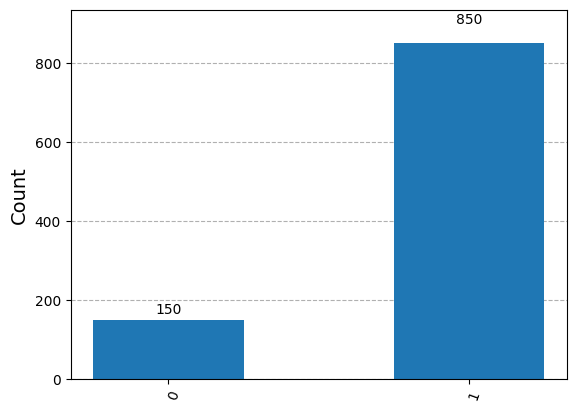

In [10]:
print(res)
display(qc.draw(reverse_bits=True))
plot_histogram(res)